In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('D:\Fuse taining\ISEAR.csv',names=  ['index','emotions','message'])

In [3]:
data.head()

,index,emotions,message
0,0,joy,On days when I feel close to my partner and ot...
1,1,fear,Every time I imagine that someone I love or I ...
2,2,anger,When I had been obviously unjustly treated and...
3,3,sadness,When I think about the short time that we live...
4,4,disgust,At a gathering I found myself involuntarily si...


In [4]:
df = data.drop(columns =['index'])

In [5]:
df.head(2)

,emotions,message
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...


Before moving forward let's see shape of dataframe

In [6]:
df.shape

(7446, 2)

In [7]:
df.emotions.value_counts()

joy        1082
sadness    1074
anger      1069
fear       1063
disgust    1059
shame      1059
guilt      1040
Name: emotions, dtype: int64

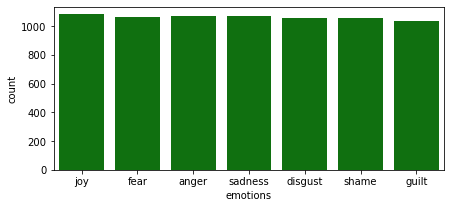

In [8]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(x="emotions", data=df, color="g");

##### It's a perfectly balanced dataset.

In [9]:
df.message.values[0]

'On days when I feel close to my partner and other friends.   \nWhen I feel at peace with myself and also experience a close  \ncontact with people whom I regard greatly.'

As you can see there are `\n` and extra spaces in `message` data. So you need to clean it. Use regular expression to do so.First lets see what kind of unnecessary symbols we have in this dataset.

In [10]:
# regx use garera falne symbols, stopwords , countvetoriser, fit , sgd classifirr,
# f1, confusion, accuracy, precison and recall( calssification report)

In [11]:
import re
def clean_tweet(tweet): 
    ''' 
    Utility function to clean tweet text by removing links, special characters 
    using simple regex statements. 
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())

In [12]:
clean_tweet(df.message.values[0])

'On days when I feel close to my partner and other friends When I feel at peace with myself and also experience a close contact with people whom I regard greatly.'

In [13]:
df1 = df.copy()

In [14]:
df1['message'] = df1['message'].apply(lambda x: clean_tweet(x))

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df1.message
y = df1.emotions

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [20]:
pipe = make_pipeline(TfidfVectorizer(), MultinomialNB())
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)

In [22]:
precision_recall_f1score = precision_recall_fscore_support(y_test, y_pred, average='micro')
metric = {'accuray': accuracy, 'precision_recall_f1_score': precision_recall_f1score}

In [23]:
metric

{'accuray': 0.561744966442953,
 'precision_recall_f1_score': (0.561744966442953,
  0.561744966442953,
  0.561744966442953,
  None)}

In [24]:
# !pip install imblearn

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.5785234899328859
              precision    recall  f1-score   support

       anger       0.44      0.49      0.46       111
     disgust       0.70      0.53      0.60        99
        fear       0.66      0.73      0.69        94
       guilt       0.45      0.51      0.48       110
         joy       0.67      0.76      0.71       100
     sadness       0.64      0.57      0.61       121
       shame       0.57      0.50      0.53       110

    accuracy                           0.58       745
   macro avg       0.59      0.58      0.58       745
weighted avg       0.59      0.58      0.58       745



In [27]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)


y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.6067114093959731
              precision    recall  f1-score   support

       anger       0.53      0.38      0.44       111
     disgust       0.63      0.67      0.65        99
        fear       0.56      0.81      0.66        94
       guilt       0.61      0.54      0.57       110
         joy       0.59      0.84      0.69       100
     sadness       0.69      0.58      0.63       121
       shame       0.63      0.50      0.56       110

    accuracy                           0.61       745
   macro avg       0.61      0.62      0.60       745
weighted avg       0.61      0.61      0.60       745



# Another method

In [28]:
from nltk.corpus import stopwords
import nltk

In [29]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))


def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    


In [30]:
df['message'] = df['message'].apply(lambda x: clean_text(x))

In [31]:
df['message']

0       days feel close partner friends feel peace als...
1       every time imagine someone love could contact ...
2       obviously unjustly treated possibility elucida...
3       think short time live relate periods life thin...
4       gathering found involuntarily sitting next two...
                              ...                        
7441    last week planned play tennis booked tennis co...
7442                        ill stay hospital period time
7443    days back waiting bus bus stop getting bus pre...
7444    days back tutorial class teacher randomly assi...
7445     quarrelled sister deliberately messed belongings
Name: message, Length: 7446, dtype: object

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

In [33]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='modified_huber', penalty='l2',alpha=1e-3, random_state=2020, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)


y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.6161073825503356
              precision    recall  f1-score   support

       anger       0.49      0.50      0.49       111
     disgust       0.59      0.63      0.61        99
        fear       0.70      0.81      0.75        94
       guilt       0.56      0.55      0.56       110
         joy       0.64      0.81      0.71       100
     sadness       0.73      0.60      0.65       121
       shame       0.60      0.47      0.53       110

    accuracy                           0.62       745
   macro avg       0.62      0.62      0.62       745
weighted avg       0.62      0.62      0.61       745



In [34]:
from sklearn.metrics import confusion_matrix 

In [35]:
results = confusion_matrix(y_test, y_pred) 

In [36]:
results

array([[55, 15,  8, 12,  9,  8,  4],
       [19, 62,  4,  2,  5,  1,  6],
       [ 4,  2, 76,  3,  4,  2,  3],
       [13,  7,  4, 61,  4,  9, 12],
       [ 4,  3,  1,  4, 81,  4,  3],
       [ 8,  4,  8,  9, 14, 72,  6],
       [ 9, 12,  7, 17, 10,  3, 52]], dtype=int64)